# Multiple Linear Regression

**Problem Statement**
A real estate organisation want to predict the sale price of an apartment based on its parameters.

- to find out the independent variables having significance over the dependent variable(`Sale price`)
- to estimate the sales price by building a model
- to check the accuracy of the model

*Steps to follow*
- Visualize and understand the dataset
- Prepare the dataset(train test split, scaling)
- Train the dataset
- Residual analysis
- Estimate the target variable

In [2]:
#Importing necessary libraries

#numpy, pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#warnings for seaborn
import warnings
warnings.filterwarnings('ignore')

#stastsmodel
import statsmodels
import statsmodels.api as sm

#sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Step 1 : Reading and Visualizing data

In [3]:
#Reading the csv
house = pd.read_csv('Housing.csv')
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#Shape of the dataset
house.shape

(545, 13)

In [5]:
#Datatypes
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Visualizing the data to answer to the question** - Is it right/worth to do a linear regression ? <br>
**Ans : Yes**, it is worth since there are some variables with correlation with `price`

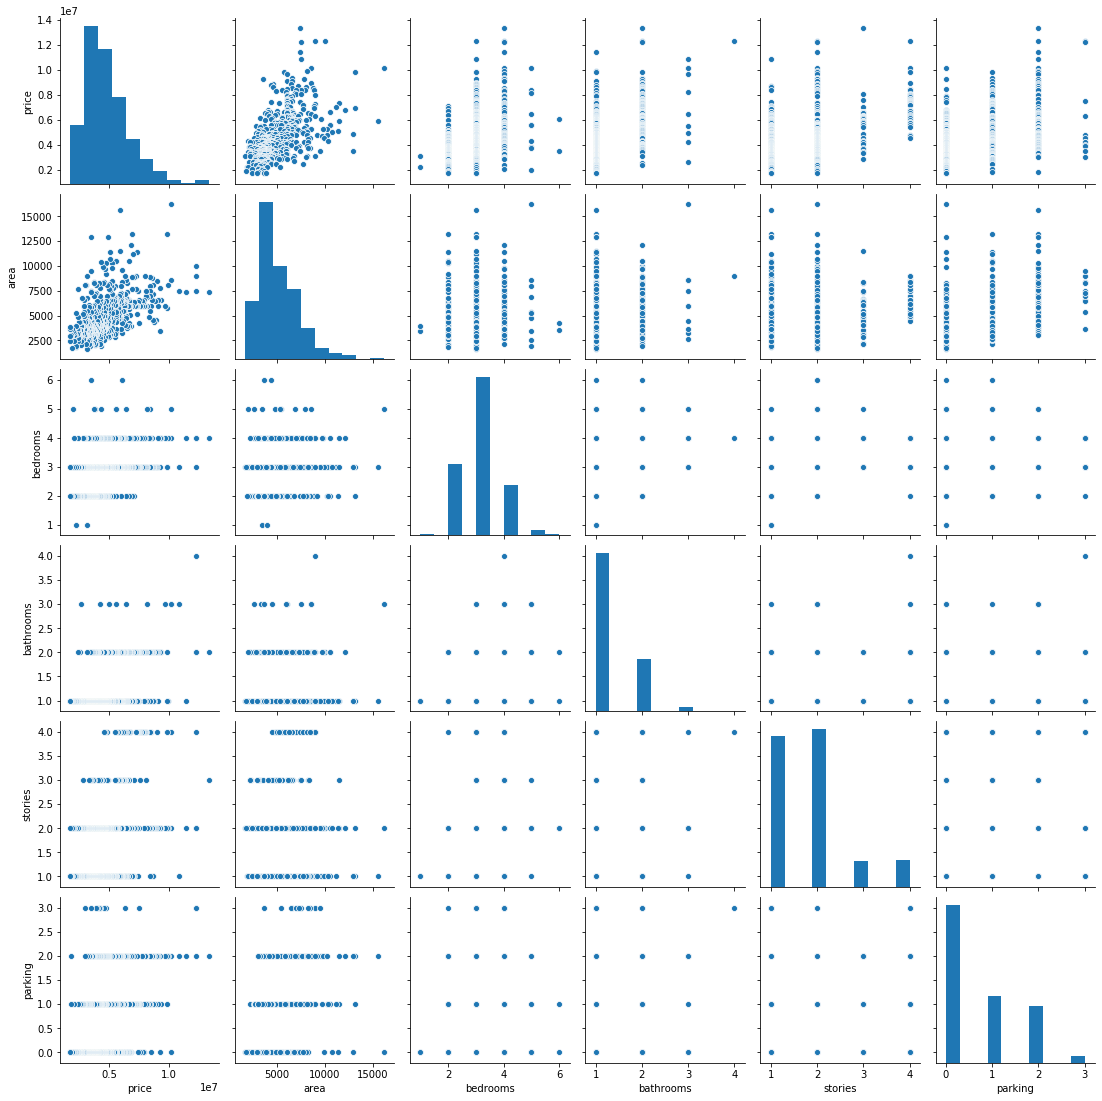

In [6]:
#Visualizing numerical data
sns.pairplot(house)
plt.show()

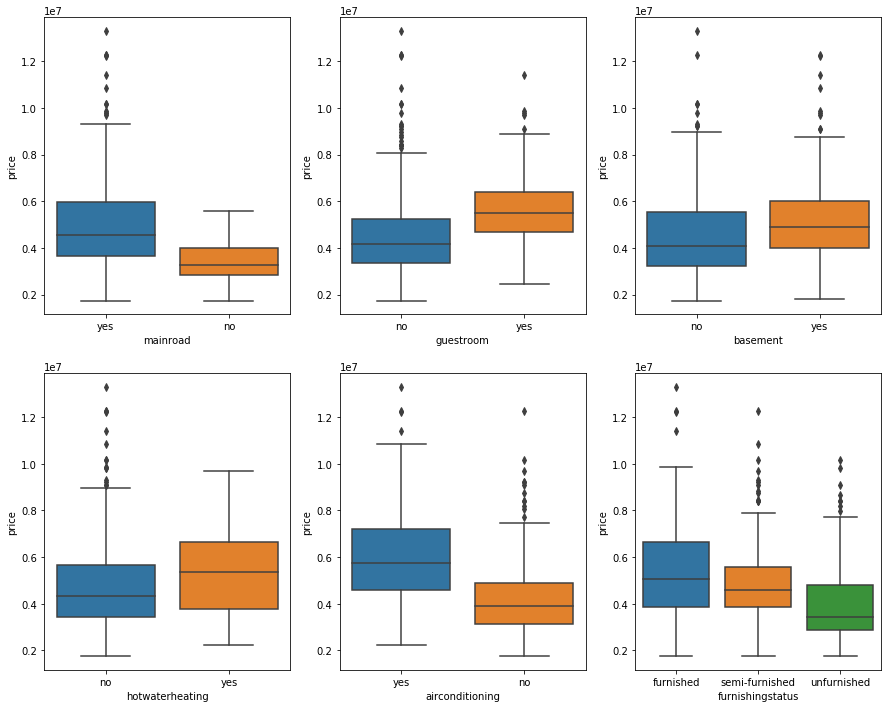

In [7]:
#Visualizing categorical data
plt.figure(figsize = (15,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = house)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = house)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = house)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = house)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = house)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = house)
plt.show()

## Preparing the data for modelling

- Encoding steps
    - Mapping yes to 1 and no to 0
    - Creating dummies
- Train test split
- Scaling

### Encoding

In [8]:
#Encoding 'yes' --> 1
#Encoding 'no' --> 0

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
house[varlist] = house[varlist].apply(lambda x : x.map({'yes' : 1, 'no' : 0}))
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
#Creating the dummies

var = house['furnishingstatus']
var = pd.get_dummies(var, drop_first = True)
var.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [10]:
#Concat two dataframes

house = pd.concat([house,var], axis = 1)
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [11]:
#Dropping the 'furnishingstatus'
house.drop(columns = 'furnishingstatus', inplace = True)
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Train Test Split

In [12]:
df_train, df_test = train_test_split(house, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### Rescaling the Feature

In [13]:
#Import library
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

num_var = ['area', 'price', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [15]:
#The test data should not be fitted but directly transformed on the train data
#i.e Scaling happens on the test data on the min max value of the training data

df_test[num_var] = scaler.transform(df_test[num_var])

df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


## Building the model

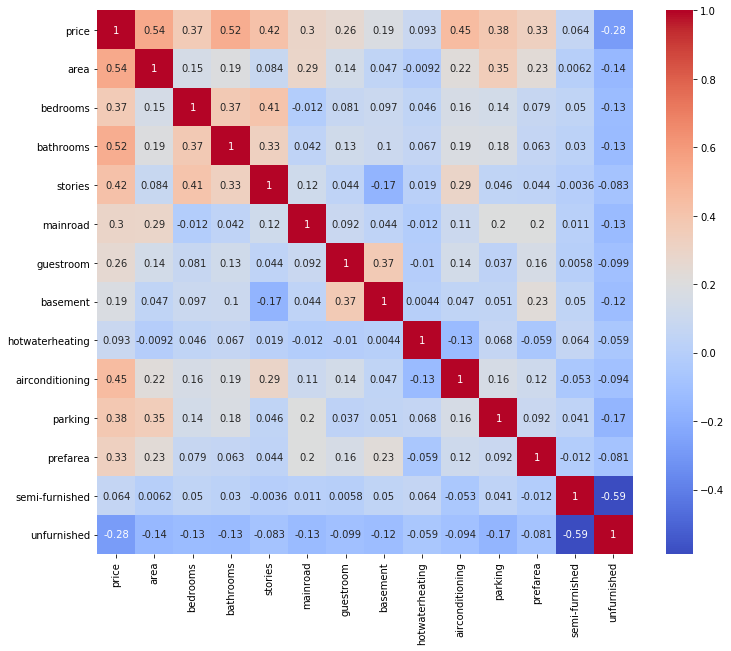

In [19]:
# Checking the correlation to determine best suited Features

plt.figure(figsize = (12,10))
sns.heatmap(house.corr(), annot = True, cmap = 'coolwarm')
plt.show()

### Building Simple Linear Regression 'Price Vs Area'

In [24]:
y_train = df_train.pop('price')
X_train = df_train['area']

In [25]:
#Adding a const to X_train
X_train_sm = sm.add_constant(X_train)

In [26]:
#Now creating a linear regression model
#Using statsmodel

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           3.15e-29
Time:                        19:09:05   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Performing Regression by adding more feautures step by step

#### Adding a feature - `bathrooms` 

In [36]:
#Adding bathroom as predictor variable
X_train = df_train[['area', 'bathrooms']]

In [37]:
#Adding a const to X_train
X_train_sm = sm.add_constant(X_train)

In [38]:
#Now creating a linear regression model
#Using statsmodel

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           2.51e-54
Time:                        19:12:22   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding a feature - `bathrooms, airconditioning` 

In [40]:
#Adding bathroom as predictor variable
X_train = df_train[['area', 'bathrooms', 'airconditioning']]

In [41]:
#Adding a const to X_train
X_train_sm = sm.add_constant(X_train)

In [42]:
#Now creating a linear regression model
#Using statsmodel

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           6.61e-63
Time:                        19:12:34   Log-Likelihood:                 310.99
No. Observations:                 381   AIC:                            -614.0
Df Residuals:                     377   BIC:                            -598.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0948      0.011      8.932      0.000       0.074       0.116
area                0.3581      0.031     11.414      0.000       0.296       0.420
bathrooms           0.2650      0.024     11.021      0.000       0.218       0.312
airconditioning     0.0870      0.013      6.916      0.000       0.062       0.112
==============================================================================
Omnibus:                       67.166   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.372
Skew:                           0.863   Prob(JB):                     4.52e-37
Kurtosis:                       5.750   Cond. No.                         6.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding a feature - `bathrooms, airconditioning, stories` 

In [44]:
#Adding bathroom as predictor variable
X_train = df_train[['area', 'bathrooms', 'airconditioning', 'stories']]

In [45]:
#Adding a const to X_train
X_train_sm = sm.add_constant(X_train)

In [46]:
#Now creating a linear regression model
#Using statsmodel

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [47]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.14e-69
Time:                        19:15:55   Log-Likelihood:                 329.46
No. Observations:                 381   AIC:                            -648.9
Df Residuals:                     376   BIC:                            -629.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0719      0.011      6.677      0.000       0.051       0.093
area                0.3620      0.030     12.094      0.000       0.303       0.421
bathrooms           0.2286      0.024      9.651      0.000       0.182       0.275
airconditioning     0.0696      0.012      5.647      0.000       0.045       0.094
stories             0.1187      0.019      6.187      0.000       0.081       0.156
==============================================================================
Omnibus:                       82.202   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.090
Skew:                           0.994   Prob(JB):                     1.99e-52
Kurtosis:                       6.324   Cond. No.                         6.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Performing Regression by adding all the Feature and drop one by one

#### Adding all the features

In [48]:
#Adding bathroom as predictor variable
X_train = df_train

In [49]:
#Adding a const to X_train
X_train_sm = sm.add_constant(X_train)

In [50]:
#Now creating a linear regression model
#Using statsmodel

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [51]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           8.83e-83
Time:                        19:17:38   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation** 
- `bedrooms, basements, semi-furnished` have high p value

**Now Calculating the `VIF` to check for multi-colinearity**

In [52]:
#Adding the library from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF Factor'] = round(vif['VIF Factor'], 2)
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,4.67,area
1,7.33,bedrooms
2,1.67,bathrooms
3,2.70,stories
4,6.02,mainroad
5,1.47,guestroom
6,2.02,basement
7,1.14,hotwaterheating
8,1.77,airconditioning
9,2.12,parking


**Observation**
- `bedroom`, `mainroad`, have high VIF. (i.e greater than `5`)

**Based on the p value and VIF value**

- `bedroom` has high p value and high VIF -  so it is dropped

In [55]:
X_train.pop('bedrooms')

359    0.4
19     0.4
159    0.4
35     0.4
28     0.8
      ... 
526    0.2
53     0.4
350    0.2
79     0.4
520    0.2
Name: bedrooms, Length: 381, dtype: float64

In [56]:
#Now re-calculating the p value and VIF of the model

#Adding a const to X_train
X_train_sm = sm.add_constant(X_train)

#Now creating a linear regression model
#Using statsmodel

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           2.35e-83
Time:                        19:35:00   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0351      0.017      2.032      0.043       0.001       0.069
area                0.2350      0.030      7.799      0.000       0.176       0.294
bathrooms           0.1964      0.022      9.114      0.000       0.154       0.239
stories             0.1178      0.018      6.643      0.000       0.083       0.153
mainroad            0.0488      0.014      3.419      0.001       0.021       0.077
guestroom           0.0301      0.014      2.207      0.028       0.003       0.057
basement            0.0239      0.011      2.179      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.007      0.000       0.044       0.129
airconditioning     0.0666      0.011      5.870      0.000       0.044       0.089
parking             0.0629      0.018      3.495      0.001       0.027       0.098
prefarea            0.0597      0.012      5.055      0.000       0.036       0.083
semi-furnished      0.0008      0.012      0.067      0.947      -0.022       0.024
unfurnished        -0.0318      0.013     -2.504      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       97.809   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           1.131   Prob(JB):                     1.27e-71
Kurtosis:                       6.930   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Variance Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['Variance Factor'] = round(vif['Variance Factor'], 2)
vif['Features'] = X_train.columns
vif

,Variance Factor,Features
0,4.55,area
1,1.61,bathrooms
2,2.24,stories
3,5.53,mainroad
4,1.46,guestroom
5,1.90,basement
6,1.13,hotwaterheating
7,1.77,airconditioning
8,2.11,parking
9,1.51,prefarea


**Observation**
- After removing **`bedrooms`**
    - `mainroad` has low p value and `high VIF`
    - `semi-furnished` has high p value and `low VIF`
        
**In this case, first we will drop the feature having `high p value` as it can make 
the `high VIF` value to become `low VIF` value**

In [60]:
X_train.pop('semi-furnished')

359    0
19     1
159    0
35     0
28     0
      ..
526    0
53     1
350    1
79     0
520    0
Name: semi-furnished, Length: 381, dtype: uint8

In [61]:
#Now re-calculating the p value and VIF of the model

#Adding a const to X_train
X_train_sm = sm.add_constant(X_train)

#Now creating a linear regression model
#Using statsmodel

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           2.73e-84
Time:                        21:47:21   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif['Variance Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['Variance Factor'] = round(vif['Variance Factor'], 2)
vif['Features'] = X_train.columns
vif

,Variance Factor,Features
0,4.55,area
1,1.61,bathrooms
2,2.23,stories
3,4.79,mainroad
4,1.46,guestroom
5,1.87,basement
6,1.12,hotwaterheating
7,1.76,airconditioning
8,2.10,parking
9,1.50,prefarea
